<a href="https://colab.research.google.com/github/xhxuciedu/CS284A/blob/master/Breast_Cancer_Wisconsin_Dataset_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Apply a binary logistic regression using the Breast Cancer Wisconsin dataset from scikit-learn, which is a well-known dataset for breast cancer classification (binary classification: malignant vs. benign).

We will train a logistic regression model to classify whether a tumor is malignant or benign based on the features in the dataset and visualize the results using confusion matrix, ROC curve, and precision-recall curves.

In [12]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve, auc, precision_recall_curve

## Data Loading:
We load the breast cancer dataset using load_breast_cancer(), which contains features related to tumor characteristics and the target (malignant or benign).

In [19]:
# Load the Breast Cancer dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

In [20]:
X.shape

(569, 30)

## Data Splitting:
The dataset is split into training (80%) and testing (20%) sets using train_test_split().

In [23]:

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Standardization:
We use StandardScaler to standardize the data, which is essential for logistic regression since it is sensitive to the scale of the input features.

In [24]:
# Standardize the feature data (important for logistic regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Model Training:
The logistic regression model is trained using LogisticRegression() with max_iter=1000 to ensure it converges.

In [25]:

# Train a logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

## Prediction:
The model makes predictions on the test set, both in binary form (y_pred) and probabilities (y_pred_prob).

In [26]:

# Make predictions
y_pred = model.predict(X_test_scaled)
y_pred_prob = model.predict_proba(X_test_scaled)[:, 1]

## Evaluation:
We calculate the accuracy and print a classification report, which includes precision, recall, and F1-scores.

In [30]:
# Model evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.97

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



## Confusion Matrix:
The confusion matrix is plotted to visualize the number of true positives, true negatives, false positives, and false negatives.

In [33]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

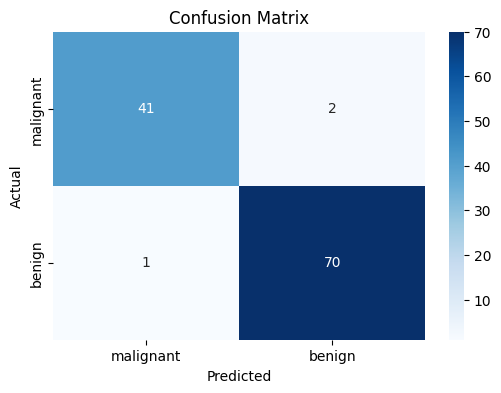

In [34]:
# Plotting Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=data.target_names, yticklabels=data.target_names)
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


## ROC Curve:
The Receiver Operating Characteristic (ROC) curve is plotted to evaluate the trade-off between true positive rate (sensitivity) and false positive rate.

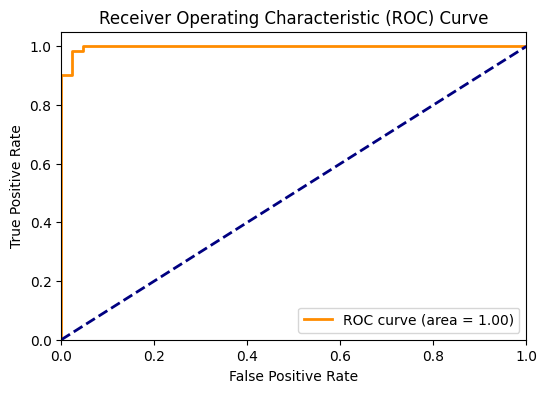

In [35]:

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()



## Precision-Recall Curve:
The precision-recall curve is plotted, which is especially useful for imbalanced datasets.

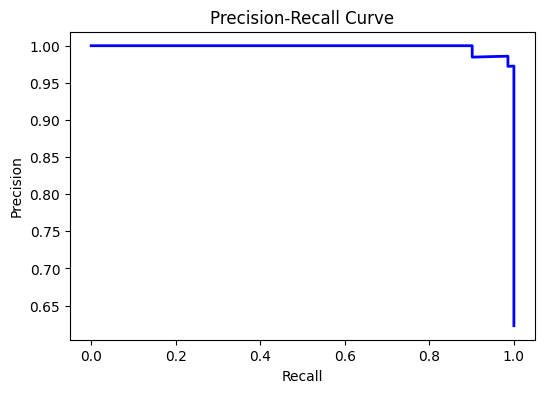

In [36]:
# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)

# Plotting Precision-Recall Curve
plt.figure(figsize=(6,4))
plt.plot(recall, precision, color='blue', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()